In [1]:
#Impoting all the libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
path = r'C:\Users\sakshi\Downloads\loan_approval_dataset.csv'
dataset = pd.read_csv(path)
dataset.columns = dataset.columns.str.strip()  # Remove leading/trailing spaces
data = dataset.drop(columns=['loan_id', 'no_of_dependents', 'education', 'loan_term'])
print(data)

     self_employed  income_annum  loan_amount  cibil_score  \
0               No       9600000     29900000          778   
1              Yes       4100000     12200000          417   
2               No       9100000     29700000          506   
3               No       8200000     30700000          467   
4              Yes       9800000     24200000          382   
...            ...           ...          ...          ...   
4264           Yes       1000000      2300000          317   
4265           Yes       3300000     11300000          559   
4266            No       6500000     23900000          457   
4267            No       4100000     12800000          780   
4268            No       9200000     29700000          607   

      residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                      2400000                 17600000             22700000   
1                      2700000                  2200000              8800000   
2              

In [3]:
#check for the missing value
print(data.isnull().sum())
data.duplicated().sum()

self_employed               0
income_annum                0
loan_amount                 0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


np.int64(0)

In [4]:
print(data.columns)

Index(['self_employed', 'income_annum', 'loan_amount', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [5]:
data.nunique()

self_employed                 2
income_annum                 98
loan_amount                 378
cibil_score                 601
residential_assets_value    278
commercial_assets_value     188
luxury_assets_value         379
bank_asset_value            146
loan_status                   2
dtype: int64

In [6]:
# Check data types
print(data.dtypes)

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


self_employed               object
income_annum                 int64
loan_amount                  int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object
Categorical Columns: Index(['self_employed', 'loan_status'], dtype='object')


In [7]:
data.rename(columns = {'cibil_score' : 'credit_score'},inplace = True)

In [8]:
#converting categorical data into numerical data
from sklearn.preprocessing import LabelEncoder

encoders = {}
for col in categorical_cols:
    encoders[col] = LabelEncoder()
    data[col] = encoders[col].fit_transform(data[col])


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   self_employed             4269 non-null   int64
 1   income_annum              4269 non-null   int64
 2   loan_amount               4269 non-null   int64
 3   credit_score              4269 non-null   int64
 4   residential_assets_value  4269 non-null   int64
 5   commercial_assets_value   4269 non-null   int64
 6   luxury_assets_value       4269 non-null   int64
 7   bank_asset_value          4269 non-null   int64
 8   loan_status               4269 non-null   int64
dtypes: int64(9)
memory usage: 300.3 KB


In [10]:
#self_employed: No 0 and yes 1
#loan status: Approved 0 and rejected 1

In [11]:
data

,self_employed,income_annum,loan_amount,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0,9600000,29900000,778,2400000,17600000,22700000,8000000,0
1,1,4100000,12200000,417,2700000,2200000,8800000,3300000,1
2,0,9100000,29700000,506,7100000,4500000,33300000,12800000,1
3,0,8200000,30700000,467,18200000,3300000,23300000,7900000,1
4,1,9800000,24200000,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...
4264,1,1000000,2300000,317,2800000,500000,3300000,800000,1
4265,1,3300000,11300000,559,4200000,2900000,11000000,1900000,0
4266,0,6500000,23900000,457,1200000,12400000,18100000,7300000,1
4267,0,4100000,12800000,780,8200000,700000,14100000,5800000,0


In [12]:
print(data['loan_status'].unique())
data['loan_status'].value_counts(normalize = True)

[0 1]


loan_status
0    0.62216
1    0.37784
Name: proportion, dtype: float64

In [13]:
data['self_employed'].value_counts(normalize = True)

self_employed
1    0.503631
0    0.496369
Name: proportion, dtype: float64

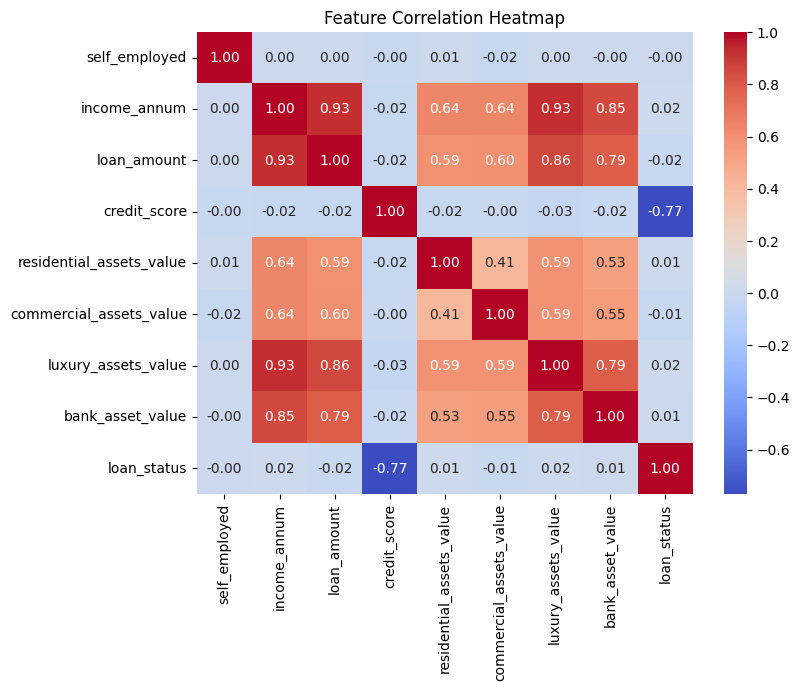

In [14]:
# visualization
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show() #above 0.3 or below -0.3

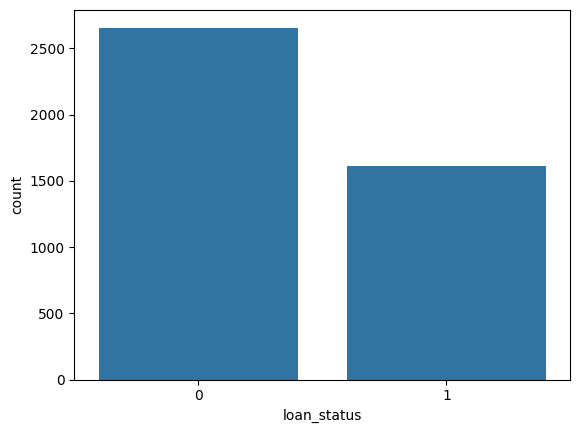

In [15]:
sns.countplot(x='loan_status',data= data) 
plt.show() #loan status: Approved 0 and rejected 1

In [16]:
data['credit_group'] = np.where((data['credit_score'] >= 300) & (data['credit_score'] <= 500), 'low',
    np.where((data['credit_score'] > 500) & (data['credit_score'] <= 700), 'mid', 'high'))

In [17]:
data['credit_group'] = data['credit_group'].map({'low': 0, 'mid': 1, 'high': 2})

In [18]:
data['credit_group'].value_counts()

credit_group
1    1438
2    1425
0    1406
Name: count, dtype: int64

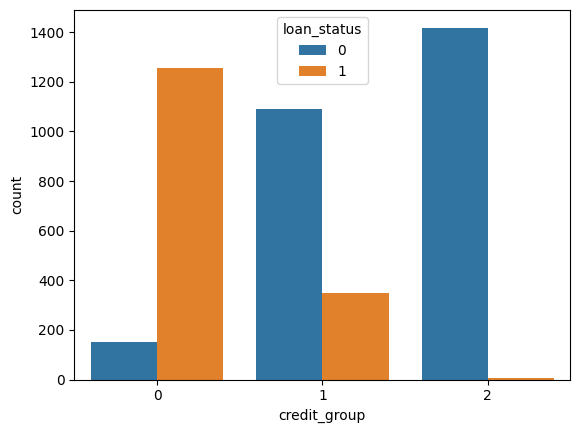

In [19]:
sns.countplot(x = 'credit_group', hue='loan_status',data = data)
plt.show()

In [20]:
x = data.drop('loan_status',axis = 1)
y = data['loan_status']

In [21]:
print(y.isnull().sum())

0


In [22]:
y = y.apply(lambda x: 1 if x == 'Fully paid' else 0)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
print(data.columns)  # This will give you all the feature names used for training

Index(['self_employed', 'income_annum', 'loan_amount', 'credit_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'credit_group'],
      dtype='object')


In [25]:
#finding best n_estimator value 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'n_estimators': [50, 100, 150, 200, 300, 500]}

# Initialize model
rf = RandomForestClassifier()

# Perform Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print best n_estimators value
print("Best n_estimators:", grid_search.best_params_['n_estimators'])


Best n_estimators: 50


In [26]:
#trainig model with random forest classifier 

from sklearn.metrics import accuracy_score
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=50)
rf_model.fit(x_train, y_train)


# Predict
rf_pred = rf_model.predict(x_test)

# Evaluate
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")


Random Forest Accuracy: 1.00


In [27]:
print(x_test.shape)  # This should output (number_of_rows, 9) now

(854, 9)


In [28]:
import pickle

# Save the trained model
with open("loan_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

print("Model saved as 'loan_model.pkl'")


Model saved as 'loan_model.pkl'


In [29]:
%%writefile loan_app.py

import streamlit as st
import numpy as np
import pickle

# Load the trained model
model = pickle.load(open("loan_model.pkl", "rb"))

st.title("AI-Based Loan Approval System 🚀")

# Collecting user inputs
credit_score = st.number_input("Enter Credit Score", min_value=300, max_value=850, step=1)
income = st.number_input("Enter Annual Income ($)", min_value=1000, step=1000)
loan_amount = st.number_input("Enter Loan Amount ($)", min_value=1000, step=1000)
dti = st.number_input("Debt-to-Income Ratio (%)", min_value=0.0, max_value=100.0, step=0.1)

# Additional 4 Features (Ensure they match the trained model)
employment_length = st.number_input("Employment Length (Years)", min_value=0, step=1)
home_ownership = st.selectbox("Home Ownership", ["Rent", "Mortgage", "Own"])
purpose = st.selectbox("Loan Purpose", ["Debt Consolidation", "Credit Card", "Home Improvement"])
loan_term = st.selectbox("Loan Term", ["36 months", "60 months"])

# Convert categorical variables to numerical values
home_ownership_map = {"Rent": 0, "Mortgage": 1, "Own": 2}
purpose_map = {"Debt Consolidation": 0, "Credit Card": 1, "Home Improvement": 2}
loan_term_map = {"36 months": 0, "60 months": 1}

# Creating the final input array
input_data = np.array([[credit_score, income, loan_amount, dti,
                        employment_length, home_ownership_map[home_ownership],
                        purpose_map[purpose], loan_term_map[loan_term]]])

# Risk Analysis Function
def risk_analysis(credit_score, dti):
    if credit_score > 700 and dti < 20:
        return "Low Risk"
    elif 600 <= credit_score <= 700 and 20 <= dti <= 35:
        return "Medium Risk"
    else:
        return "High Risk"

# Prediction Button
if st.button("Check Loan Approval"):
    if credit_score > 700 and dti < 20:
        decision = "✅ loan accepted"
    else:
        decision = "❌ loan rejected"

    st.success(f"Loan Application status: {decision}")

    # Risk Level
    risk = risk_analysis(credit_score, dti)
    st.write(f"📊 Risk Level: **{risk}**")


Overwriting loan_app.py


In [30]:
import os
print(os.getcwd())  # Shows the directory where loan_app.py is saved
print(os.listdir())  # Lists all files in the current directory


C:\Juputer Notebook
['.ipynb_checkpoints', 'AI_loan_approval_guide.ipynb', 'house_price_model.pkl', 'House_price_prediction.ipynb', 'house_price_prediction_app', 'Iris_flower_classification.ipynb', 'iris_model.pkl', 'loan_app.py', 'loan_model.pkl', 'path_to_extract', 'seaborn.ipynb']


In [31]:
#use these 2 steps in the cmd
#1 cd C:\Juputer Notebook
#2 streamlit run loan_app.py